In [113]:
import numpy as np
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

from qiskit.visualization import plot_histogram
import matplotlib, matplotlib_inline
from qiskit_aer.noise import NoiseModel

In [114]:
n = 4

# input has no effect on output so randomly set it to 0 or 1
const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 0:
    const_oracle.x(n)

# const_oracle.barrier()


# const_oracle.draw(output='mpl')
const_gate = const_oracle.to_gate()

In [115]:
balanced_oracle = QuantumCircuit(n+1)

l = []
for i in range(n):
    if np.random.randint(2) == 1:
        balanced_oracle.x(i)
        l.append(1)
    else:
        l.append(0)

for i in range(4):
    balanced_oracle.cx(i, n)

# balanced_oracle.barrier()

for i in range(len(l)):
    if l[i] == 1:
        balanced_oracle.x(i)

# balanced_oracle.barrier()

# balanced_oracle.draw('mpl')

balanced_gate = balanced_oracle.to_gate()

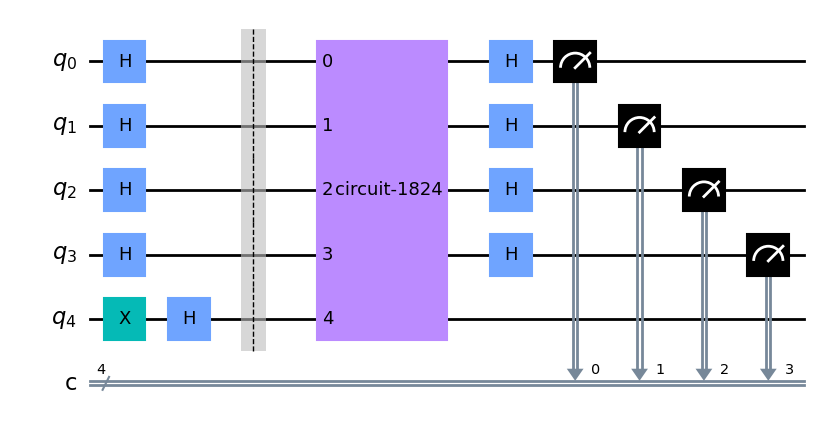

In [116]:
dj_circuit = QuantumCircuit(n+1, n)
dj_circuit.h(range(n))
dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.barrier()

case = input("const or bal")
if case == 'const':
    dj_circuit.append(const_gate, range(n+1))
else:
    dj_circuit.append(balanced_gate, range(n+1))


dj_circuit.h(range(n))
dj_circuit.measure(range(n), range(n))

dj_circuit.draw('mpl')

In [117]:
# use local simulator with IBM vigo noise model
provider = IBMQ.load_account()
nairobi = provider.get_backend('ibm_nairobi')
noise_model = NoiseModel.from_backend(nairobi)

ibmqfactory.load_account:WARNING:2023-01-12 01:46:17,113: Credentials are already in use. The existing account in the session will be replaced.


In [118]:
transpiled_circuit = transpile(dj_circuit, nairobi, optimization_level=0)

In [119]:
sim = Aer.get_backend('qasm_simulator')

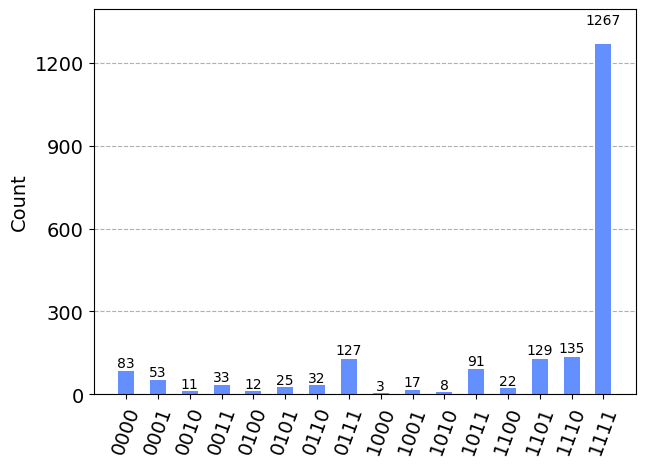

In [120]:
assembled_circuit = assemble(transpiled_circuit, shots=2048)
sim_job = sim.run(assembled_circuit, noise_model=noise_model)
sim_results = sim_job.result()
sim_counts = sim_results.get_counts()
plot_histogram(sim_counts)